# **Reconhecimento de sinais de mão utilizando Rede Neural Convolucional**

**Universidade Federal da Bahia**

**Equipe 6**: Elder dos Santos Guedes Pereira


Este é um trabalho final da disciplina ENGG69 Tópicos Especiais em Engenharia da Computação III que trata-se da implementação de uma solução com utilização de aprendizado de máquina aplicado em um problema prático.
      

### **Introdução**

In [59]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


A plataforma Kaggle possui uma API para consultar os datasets disponibiliados. O escolhido para o trabalho foi o **Signs Detection**

In [60]:
import kagglehub

path = kagglehub.dataset_download("maneesh99/signs-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/maneesh99/signs-detection-dataset/versions/2


### **Explorando o dataset**

Para o desenvolvimento de um modelo de aprendizado, é necessário ter um conhecimento prévio acerca dos dados para que os parâmetros sejam ajustados, conforme necessidades, para melhor otimização e funcionamento. Sendo assim, analisar como os dados são e se comportam é essencial


Para verificar as categorias e/ou arquivos compõem a base disponibilizada, é demonstrado abaixo a leitura dos arquivos que estão presentes no diretório que foi realizado o download

In [61]:
import os

classes = os.listdir(path)
print(f"Classes detectadas: {classes}")

Classes detectadas: ['Signs_Data_Testing.h5', 'Signs_Data_Training.h5']


In [62]:
# Caminho dos arquivos no na pasta do Colab e realizando a leitura do arquivo de extensão h5

train_data = "/root/.cache/kagglehub/datasets/maneesh99/signs-detection-dataset/versions/2/Signs_Data_Training.h5"
test_data = "/root/.cache/kagglehub/datasets/maneesh99/signs-detection-dataset/versions/2/Signs_Data_Testing.h5"

In [63]:
# Dados de Treinamento

with h5py.File(train_data, 'r') as train_data:
    X_train = np.array(train_data['train_set_x'])  # Imagens
    y_train = np.array(train_data['train_set_y'])  # Rótulos
    class_names = np.array(train_data['list_classes'])  # Classes disponíveis

In [64]:
# Dados de Teste
with h5py.File(test_data, 'r') as test_data:
    # Corrected line: Accessing 'test_set_x' instead of 'train_set_x'
    X_test = np.array(test_data['test_set_x'])  # Imagens de teste
    y_test = np.array(test_data['test_set_y'])  # Rótulos de teste

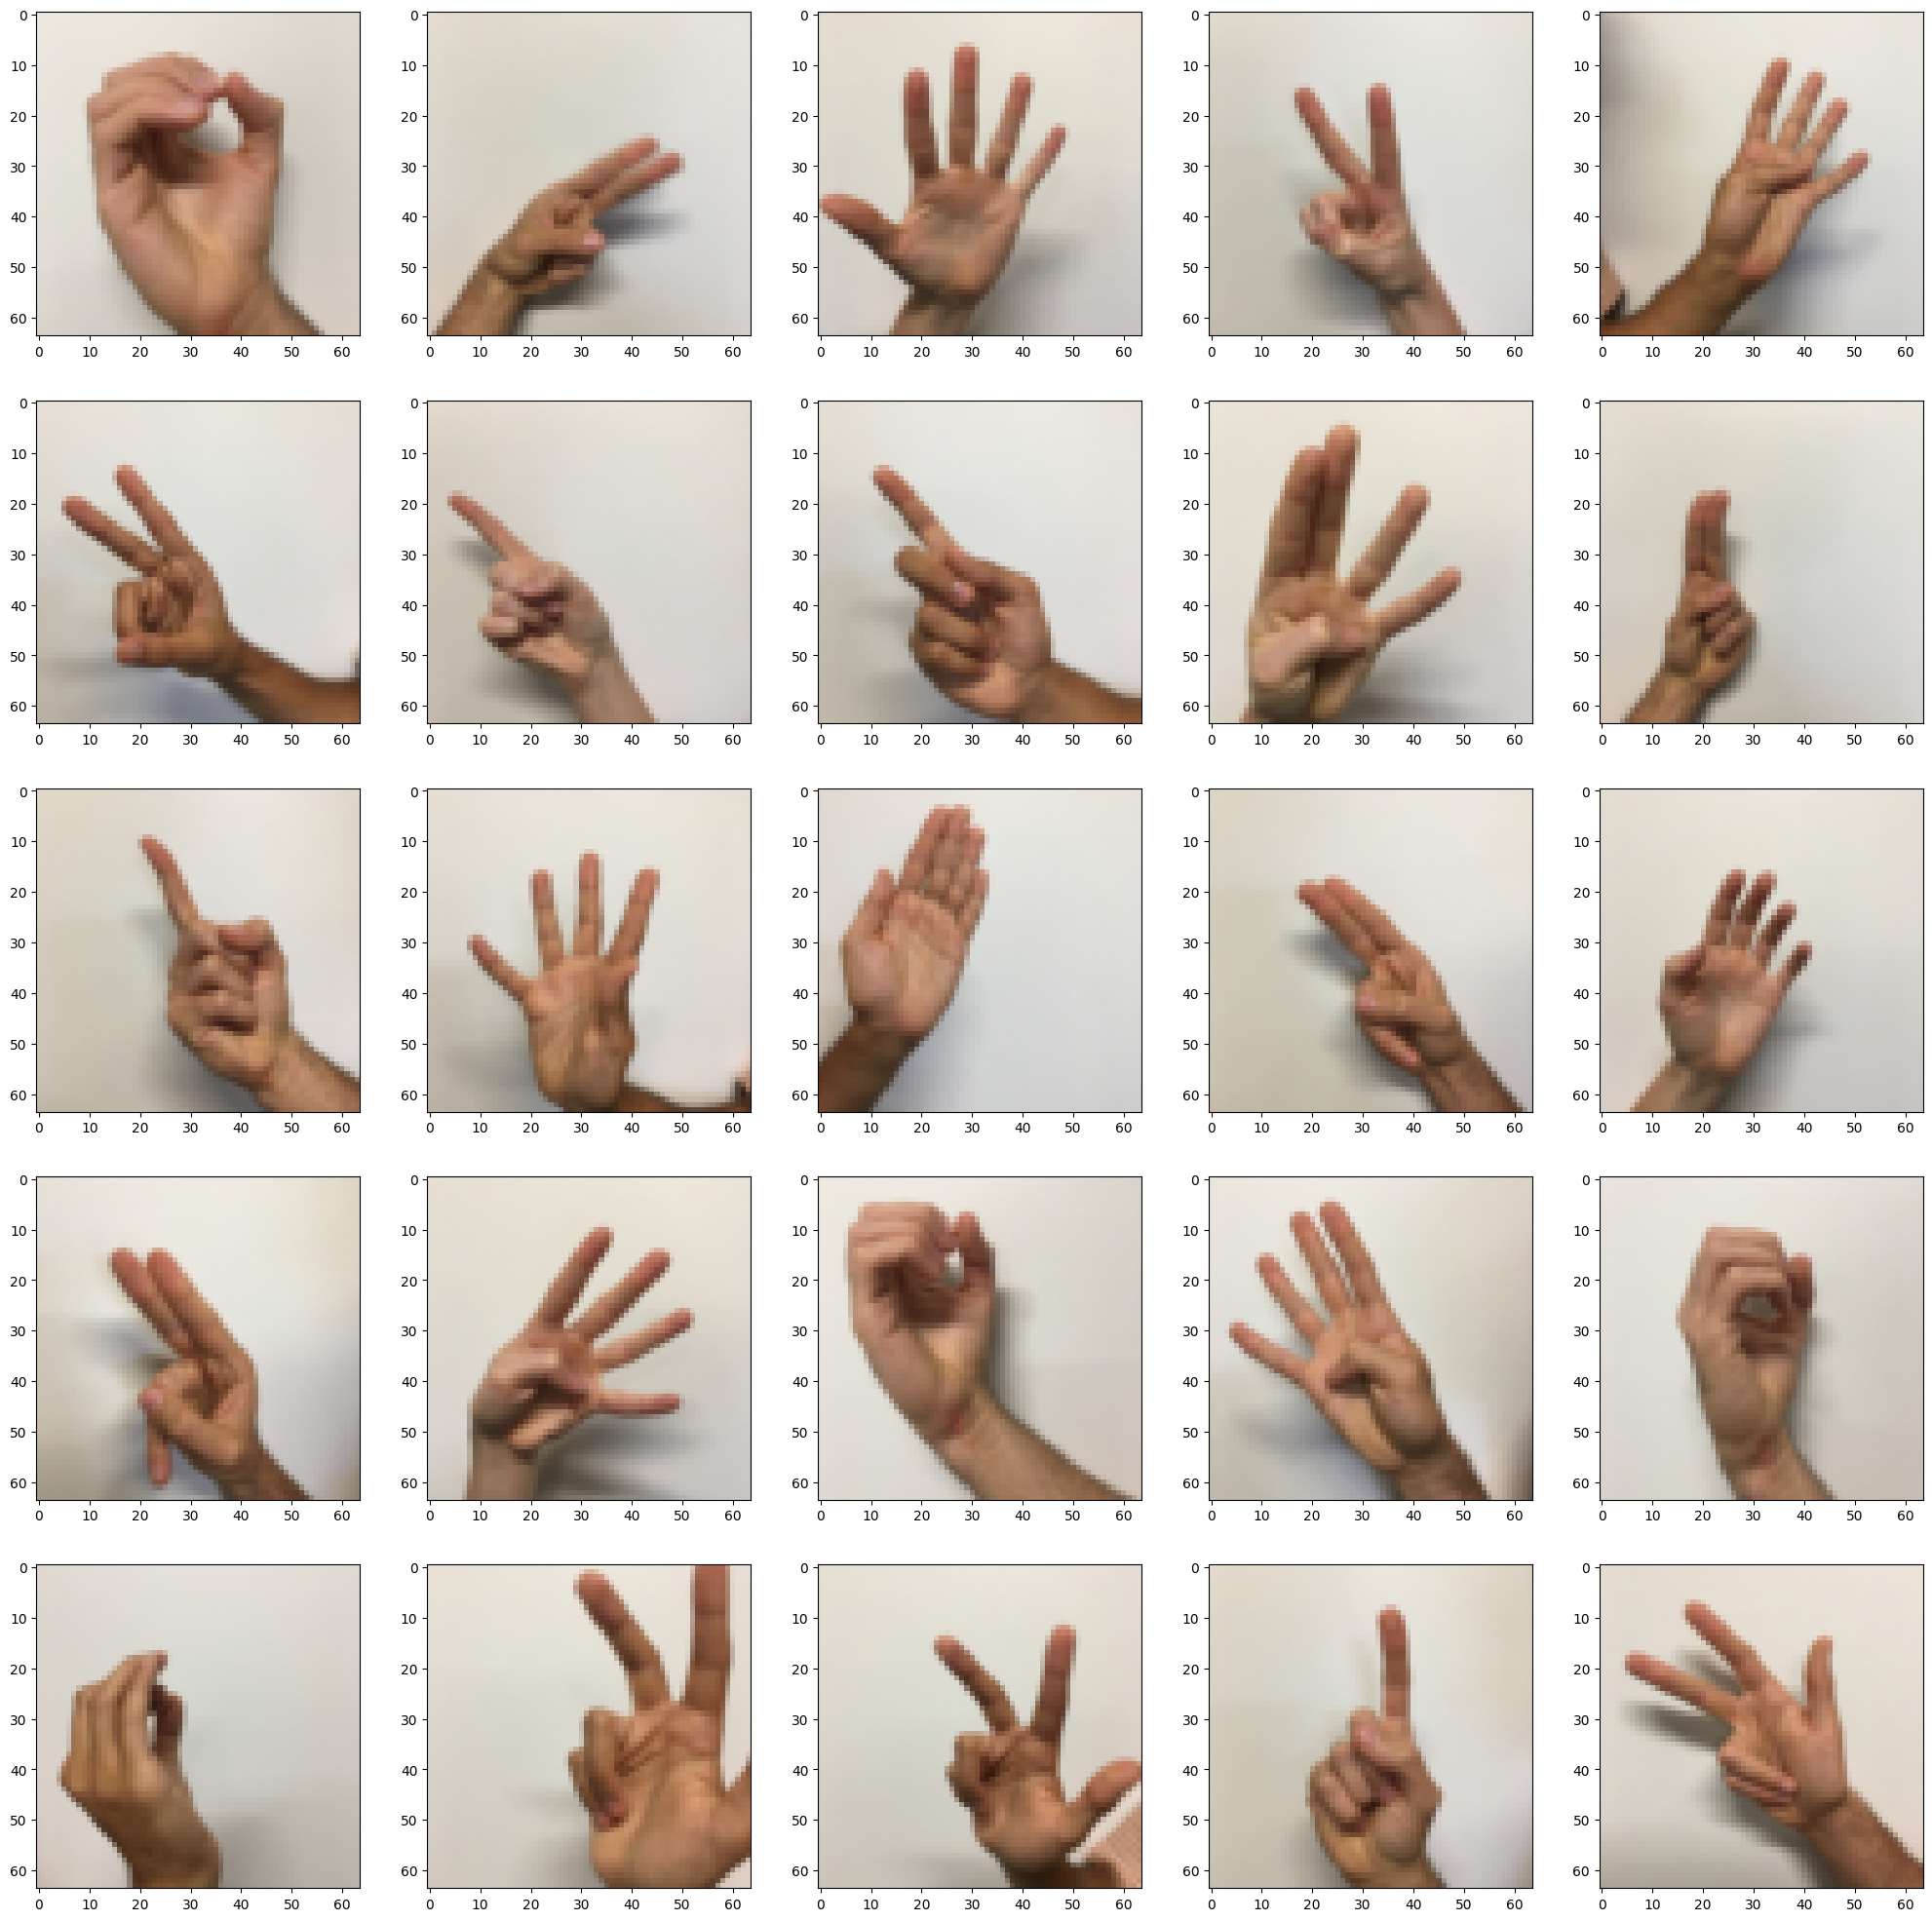

In [65]:
import random
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[i])

In [66]:
print(f"Valor máxima: {X_train.max()}")
print(f"Valor mínimo: {X_train.min()}")
print(f"Número de dimensões: {X_train.ndim}")
print(f"Formato da array:\n Treino: {X_train.shape} e {y_train.shape} \n Teste: {X_test.shape} e {y_test.shape}") # Número de elementos por dimensão

Valor máxima: 244
Valor mínimo: 4
Número de dimensões: 4
Formato da array:
 Treino: (1080, 64, 64, 3) e (1080,) 
 Teste: (120, 64, 64, 3) e (120,)


In [67]:
# Obter número de classes
num_classes = len(class_names)
print(f"Número de classes detectadas: {num_classes}")
print(f"Classes disponíveis: {class_names}")

Número de classes detectadas: 6
Classes disponíveis: [0 1 2 3 4 5]


    ✅ 6 classes encontradas ([0, 1, 2, 3, 4, 5])

    ✅ 1080 imagens de treino (64x64x3)

    ✅ 120 imagens de teste (64x64x3)

    ✅ Rótulos convertidos para one-hot encoding

Como se trata de um dataset de imagens, a intensidade dos pixels precisa ser normalizada entre a sua faixa de valors (**0-255)**.

In [68]:
# Normalização das imagens entre valores de 0 a 1
X_train = X_train / 255
X_test = X_test / 255

### **One Hot Enconding**

Para aprimorar o aprendizado do modelo, o método de one hot auxilia transformando a categoria dos dados em **binário**.

In [69]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [70]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

## **Modelo de Aprendizado**

In [71]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## **Treinamento da CNN**

In [72]:
epochs = 10

In [73]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.1728 - loss: 1.7901 - val_accuracy: 0.2333 - val_loss: 1.6680
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.4770 - loss: 1.4073 - val_accuracy: 0.5417 - val_loss: 1.2280
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.6714 - loss: 0.9511 - val_accuracy: 0.6833 - val_loss: 0.8249
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.7701 - loss: 0.7002 - val_accuracy: 0.8167 - val_loss: 0.5387
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8596 - loss: 0.4495 - val_accuracy: 0.8583 - val_loss: 0.4148
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.8647 - loss: 0.3891 - val_accuracy: 0.8667 - val_loss: 0.3518
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.9164 - loss: 0.2720 - val_accuracy: 0.9083 - val_loss: 0.2944
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.9255 - loss: 0.2323 - val_accura

📊 **Analisando o Treinamento**

    Acurácia Inicial (Época 1):
        Treino: 17.28%
        Validação: 23.33%

    Melhora ao Longo das Épocas:
        A cada época, a acurácia de treino e validação aumentaram constantemente.
        Ou seja, houve o aprendizado dos dados.

    Última Época (Época 10):
        Treino: 97.64%
        Validação: 96.67%
        🔹 Os resultado obtidos foram bem promissores.

    Loss (Função de Perda):
        Treino: 0.893
        Validação: 0.1621
        🔹 Como a perca do treino e validação é baixa, tem-se que não há overfitting significativo.

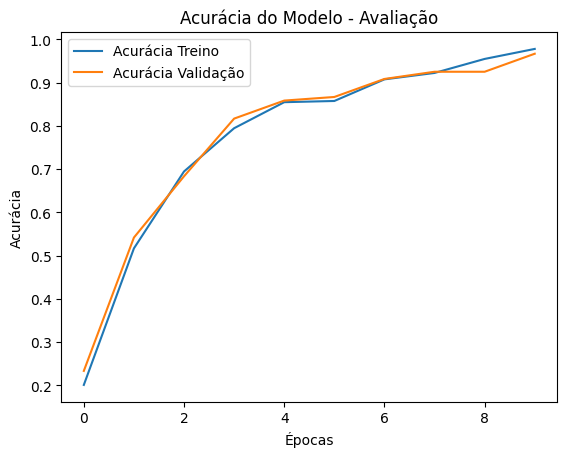

In [75]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo - Avaliação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


## **Validação do Modelo Construído**

In [76]:
model.save("cnn_signs_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
=-=-=-Resultados Obtidos =-=-=-=
Classe Predita: 1
Confiança: 0.9831057190895081


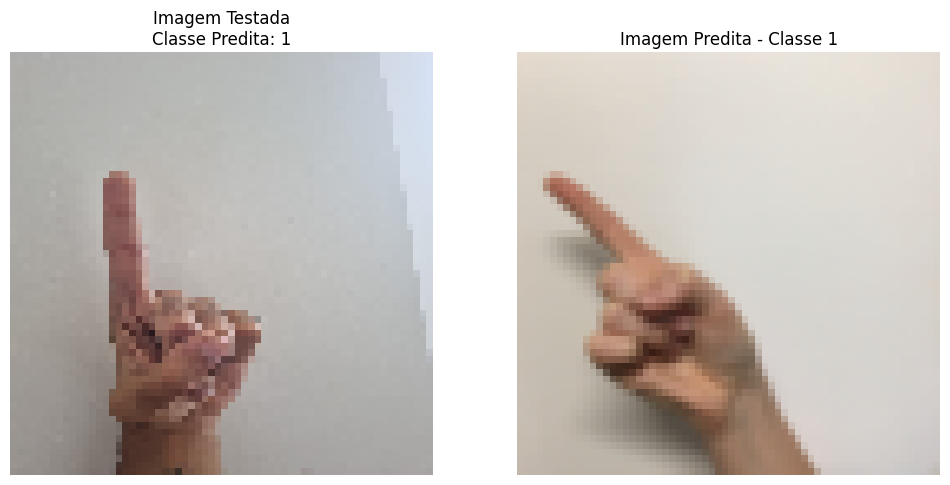

In [78]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Tratando a imagem a ser analisada

img_path = "/content/1eu.jpeg"
img = load_img(img_path, target_size=(64, 64))
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Predição

prediction = model.predict(img)
class_index = np.argmax(prediction)
confidence = prediction[0][class_index]
print("=-=-=-Resultados Obtidos =-=-=-=")
print(f"Classe Predita: {class_index}")
print(f"Confiança: {confidence}")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# VALIDAÇÃO


indices_class = np.where(np.argmax(y_train, axis=1) == class_index)[0]  # Indices onde a classe é a predita

image_index = indices_class[0]

image_to_show = X_train[image_index]  #Imagem correspondente da classe predita

# Plotando a imagem analisada e a predita
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(img[0])
axes[0].set_title(f"Imagem Testada\nClasse Predita: {class_index}")
axes[0].axis('off')


axes[1].imshow(image_to_show)
axes[1].set_title(f"Imagem Predita - Classe {class_index}")
axes[1].axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
=-=-=-Resultados Obtidos =-=-=-=
Classe Predita: 3
Confiança: 0.8686680793762207


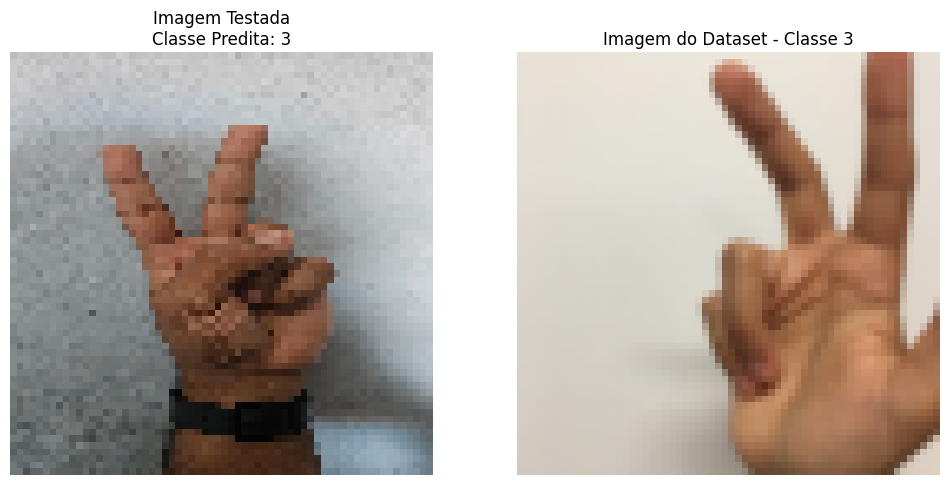

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Tratando a imagem a ser analisada

img_path = "/content/test2comed.jpeg"
img = load_img(img_path, target_size=(64, 64))
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Predição

prediction = model.predict(img)
class_index = np.argmax(prediction)
confidence = prediction[0][class_index]
print("=-=-=-Resultados Obtidos =-=-=-=")
print(f"Classe Predita: {class_index}")
print(f"Confiança: {confidence}")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# VALIDAÇÃO


indices_class = np.where(np.argmax(y_train, axis=1) == class_index)[0]  # Indices onde a classe é a predita

image_index = indices_class[0]

image_to_show = X_train[image_index]  #Imagem correspondente da classe predita

# Plotando a imagem analisada e a predita
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(img[0])
axes[0].set_title(f"Imagem Testada\nClasse Predita: {class_index}")
axes[0].axis('off')


axes[1].imshow(image_to_show)
axes[1].set_title(f"Imagem Predita - Classe {class_index}")
axes[1].axis('off')

plt.show()


## **Data Augmetation**

Apesar dos resultados obtido serem ótmos, tem-se a oportunidade de melhorar os resutlados ampliamos os dados de treino com o data augmentation, ou seja, introduzindo uma variação de dados.

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,       # Rotação aleatória de até 20 graus
    width_shift_range=0.2,    # Deslocamento horizontal aleatório de até 20% da largura
    height_shift_range=0.2,   # Deslocamento vertical aleatório de até 20% da altura
    shear_range=0.2,         # Cisalhamento aleatório de até 20 graus
    zoom_range=0.2,          # Zoom aleatório de até 20%
    horizontal_flip=True,    # Espelhamento horizontal aleatório
    fill_mode='nearest'      # Preencher pixels vazios com o valor mais próximo
)


datagen.fit(X_train)

# 3. Criar a CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# 4. Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Treinar o modelo usando o gerador de dados com augmentation
epochs = 10
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.1711 - loss: 1.8136 - val_accuracy: 0.1667 - val_loss: 1.7893
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.2111 - loss: 1.7880 - val_accuracy: 0.3167 - val_loss: 1.7319
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.2715 - loss: 1.7266 - val_accuracy: 0.4667 - val_loss: 1.6377
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - accuracy: 0.2852 - loss: 1.6664 - val_accuracy: 0.4917 - val_loss: 1.4434
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 338ms/step - accuracy: 0.3659 - loss: 1.5449 - val_accuracy: 0.5167 - val_loss: 1.2698
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.3978 - loss: 1.4786 - val_accuracy: 0.7000 - val_loss: 0.9113
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.4962 - loss: 1.2230 - val_accuracy: 0.4917 - val_loss: 1.1732
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.5135 - loss: 1.2282 - val_accurac

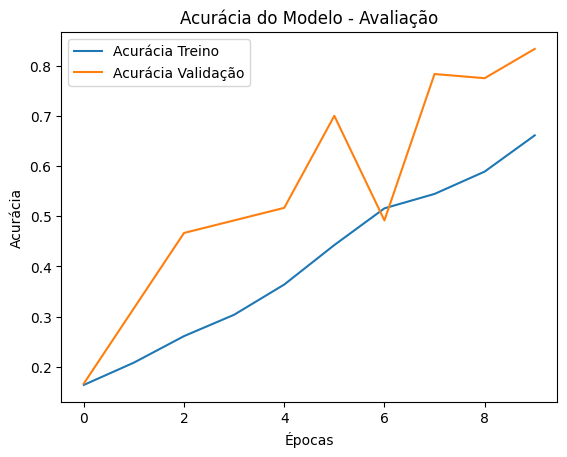

In [ ]:
# Plotar a acurácia
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo - Avaliação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


A acurácia do treinamento e validação foi bastante baixa, se comparado ao modelo inicialmente criado. O modelo aparentemente apesenta dificuldade no aprendizado dos dados introduidos.

- A augmentation dificultou/foi muito agressiva e deixou o treinamento difícil de ser feito, sendo necessário ajustar outros parâmetros para verificar
- **Não é apropriado pro nosso dataset**

## Conclusão

Neste trabalho foi desenvolvido um modelo de aprendizado utilizando rede neural convolucional para tratar dados de imagens com objetivo de fazer o reconhecimento de sinais com as mãõs.

Foi implementado para validação de fotos em tempo real e o resultado foi satisfatório. O dataset é limitado por possuir poucos dados e imagens com poucas variações de cores, ou seja, caso eu fosse aplicar em uma situação real, novas especificações teriam que ser desenvolvidas para que o modelo fosse funcionar.

Ademais, dado a forma que as imagens estão dispostas, a técnica de ata Augmetation não é válida , tendo em vista o impacto na dificuldade de aprendizado da máquina - podendo somente ser considerado pequenas angulações e constrates.